<a href="https://colab.research.google.com/github/huynhspm/Basic_ML/blob/main/Number%20Classification/Mnist_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Number Classification Project**

In [ ]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
# from display_network import *
import time

In [ ]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]

label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(50000, 28, 28) (10000, 28, 28) (10000, 28, 28)
(50000,) (10000,) (10000,)


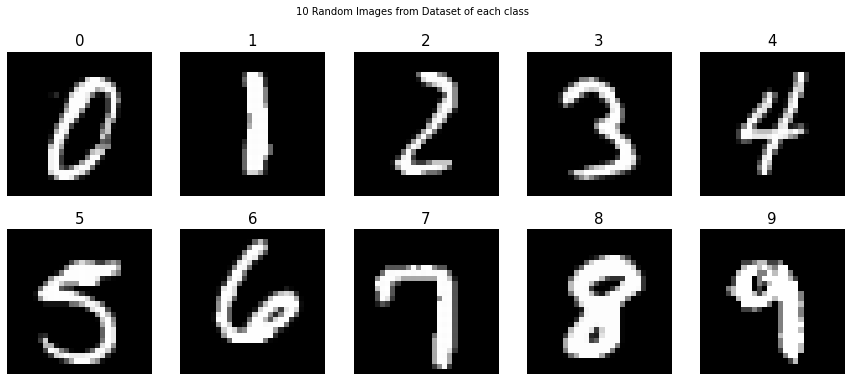

In [ ]:
# 3. show image
def get_ten_random_images():
  d = {}
  while len(d.keys()) < 10:
      idx = random.randint(0, len(y_train)-1)
      if y_train[idx] not in d.keys():
          d[y_train[idx]] = idx
  return d

d = get_ten_random_images()
rows = 2
cols = 5
fig, axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(X_train[d[i-1]], cmap = 'gray')
    axes[i-1].axis('off')
    axes[i-1].set_title(label[i-1], fontsize=15)
fig.suptitle('10 Random Images from Dataset of each class', fontsize = 10)
plt.show()

# **Classify with k_nearest_neighbors**

In [ ]:
# 1. prepare data
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

print(X_train.shape)

(50000, 784)


In [ ]:
# 2. build model
model_KNN = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)

In [ ]:
# 3. train model
start_time = time.time()
model_KNN.fit(X_train, y_train)
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

Running time: 0.01 (s)


In [ ]:
# 4. Đánh giá model với testset
start_time = time.time()
KNN_pred = model_KNN.predict(X_test)
print('KNeighborsClassifier: %d' %(100 * accuracy_score(y_test, KNN_pred)))
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

KNeighborsClassifier: 96
Running time: 34.50 (s)


# **Classify with support vector machine**

In [ ]:
# 1. prepare data
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

print(X_train.shape)

(50000, 784)


In [ ]:
# 2. build model
model_SVM = SVC(kernel='poly', gamma=1, coef0 = 1)

In [ ]:
# 3. train model
start_time = time.time()
model_SVM.fit(X_train, y_train)
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

Running time: 124.57 (s)


In [ ]:
# 4. Đánh giá model với testset
start_time = time.time()
SVM_pred = model_SVM.predict(X_test)
print('KNeighborsClassifier: %d' %(100 * accuracy_score(y_test, SVM_pred)))
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

KNeighborsClassifier: 97
Running time: 28.51 (s)


# **Classify with neural network**

In [ ]:
# 1. prepare data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
# 2. build model
model_NN = Sequential()
model_NN.add(Flatten(input_shape=(28,28,1)))
model_NN.add(Dense(128, activation="relu"))
model_NN.add(Dense(10, activation="softmax"))

model_NN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_NN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 3. train model
start_time = time.time()
model_NN.fit(X_train, y_train)
H_NN = model_NN.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=10, verbose=1)
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

1563/1563 [==============================] - 7s 2ms/step - loss: 2.8790 - accuracy: 0.8497
Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4359 - accuracy: 0.9029 - val_loss: 0.3497 - val_accuracy: 0.9191
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3190 - accuracy: 0.9212 - val_loss: 0.3120 - val_accuracy: 0.9352
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2756 - accuracy: 0.9316 - val_loss: 0.2952 - val_accuracy: 0.9289
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2411 - accuracy: 0.9377 - val_loss: 0.2554 - val_accuracy: 0.9442
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2238 - accuracy: 0.9430 - val_loss: 0.2412 - val_accuracy: 0.9424
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2271 - accuracy: 0.9458 - val_loss: 0.2293 - val_accuracy: 0.9480
Epoch 7/10
1563/1563 [=======================

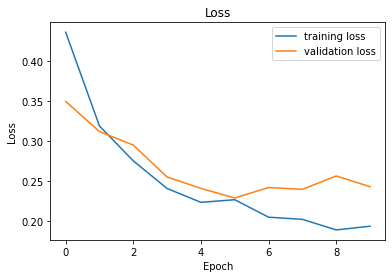

In [ ]:
# 4. Vẽ đồ thị loss của traning set và validation set
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H_NN.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H_NN.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

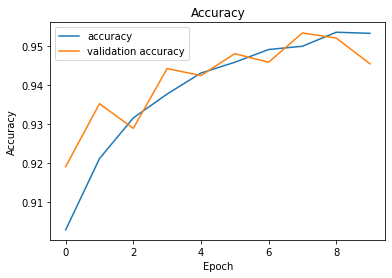

In [ ]:
# 5. Vẽ đồ thị accuracy của traning set và validation set
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H_NN.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H_NN.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# 6. Đánh giá model với testset
start_time = time.time()
print('neural network: ', model_NN.evaluate(X_test, y_test, verbose = 0))
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

neural network:  [0.26815640926361084, 0.9417999982833862]
Running time: 0.67 (s)


# **Classify with convolutional neural network**

In [ ]:
# 1. prepare data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
# 2. build model
model_CNN = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model_CNN.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

# Thêm Convolutional layer
model_CNN.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model_CNN.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model_CNN.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model_CNN.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model_CNN.add(Dense(10, activation='softmax'))

model_CNN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               589952    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [ ]:
# 3. train model
start_time = time.time()
H_CNN = model_CNN.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=10, verbose=1)
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

Epoch 1/10
1563/1563 [==============================] - 15s 4ms/step - loss: 0.3248 - accuracy: 0.9078 - val_loss: 0.0749 - val_accuracy: 0.9807
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0582 - accuracy: 0.9836 - val_loss: 0.0530 - val_accuracy: 0.9847
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0358 - accuracy: 0.9898 - val_loss: 0.0492 - val_accuracy: 0.9864
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0229 - accuracy: 0.9935 - val_loss: 0.0485 - val_accuracy: 0.9859
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0164 - accuracy: 0.9950 - val_loss: 0.0481 - val_accuracy: 0.9857
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0101 - accuracy: 0.9974 - val_loss: 0.0445 - val_accuracy: 0.9877
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0059 - accuracy: 0.9990 - val_loss: 0.0423 - val_accuracy

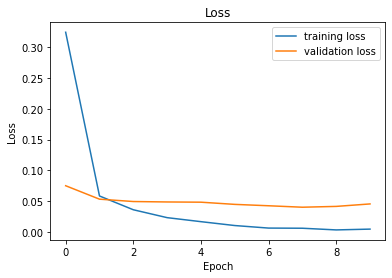

In [ ]:
# 4. Vẽ đồ thị loss của traning set và validation set
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H_CNN.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H_CNN.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

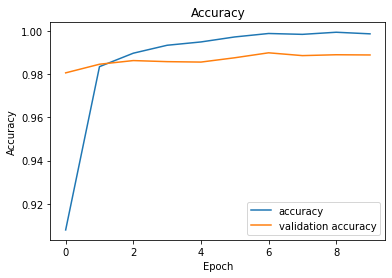

In [ ]:
# 5. Vẽ đồ thị accuracy của traning set và validation set
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H_CNN.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H_CNN.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# 6. Đánh giá model với testset
start_time = time.time()
print('neural network: ', model_CNN.evaluate(X_test, y_test, verbose = 1))
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

313/313 [==============================] - 1s 3ms/step - loss: 0.0354 - accuracy: 0.9897
neural network:  [0.03542207553982735, 0.9897000193595886]
Running time: 0.87 (s)


[[4.0968867e-10 1.2737507e-08 5.5574239e-09 3.6981067e-08 1.5527199e-11
  2.1505084e-09 6.0442276e-13 9.9999988e-01 2.1926379e-10 1.5215281e-07]]
Giá trị dự đoán:  7


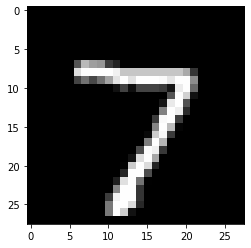

In [ ]:
# 7. predict
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

y_predict = model_CNN.predict(X_test[0].reshape(1,28,28,1))
print(y_predict)
print('Giá trị dự đoán: ', np.argmax(y_predict))

In [ ]:
# 8. load ảnh
from google.colab import files
uploaded = files.upload()

Saving test.png to test.png


5


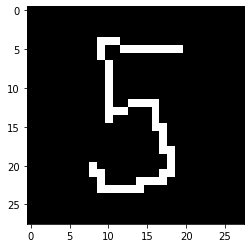

In [ ]:
# 9. predict ảnh tự vẽ 
import cv2
img = cv2.imread('test.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

y_pred = model_CNN.predict(img.reshape(1, 28, 28, 1))
print(np.argmax(y_pred))